In [3]:
# How do I choose Which model to use for myy Supervised task ?
# best tunning parameter and likely performance of my model on out-of-sample data ?

# 1--------Train and Test entire dataset

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = logreg.predict(X)
# len(y_pred)

In [18]:
#proportion of correct predictions............evaluation metric for classificaton problems
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

#it's call traing accuracy because we train and test model on same data.....

0.9733333333333334


In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred=knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


In [22]:
#unnecssarily complex overfit the training data(decision boundary,noise,signal.)
#not optimal approach

In [34]:
#2---------------Train and Test..........
# split data into train and test..........
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4)

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [44]:
acc_score=[]
k_values=range(1,26)
for k_value in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_test,y_pred))
print(acc_score)    

[0.95, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.95, 0.95]


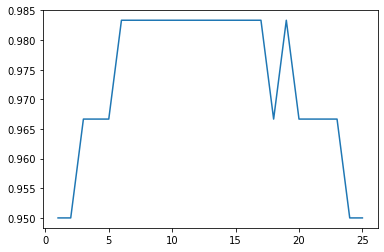

In [46]:
import matplotlib.pyplot as plt
#plot with in notebook
%matplotlib inline

plt.plot(k_values,acc_score)

# Training acc rises as model complexity increase
# Testing acc penalizes models that are not too complex or not complex enough
# In KNN as value of k decrease model becomes more complex
